# Principal component analysis
Unsupervised dimensionality reduction

## Method 1: Using NumPy

### Load data, split data, standardization

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
df = pd.DataFrame(X)
df.columns = dataObj.feature_names

# Add class column
df.insert(loc=0, column="Class", value=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Eigendecomposition of the covariance matrix.

In [85]:
cov_mat = np.cov(X_train_std, rowvar=False)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


### Total and explained variance

In [86]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

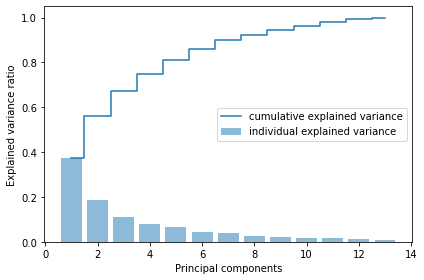

In [87]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

### Feature transformation

In [88]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the eigenvalue (k[0]) from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

### Transformation matrix, W

In [89]:
w1 = eigen_pairs[0][1]
w2 = eigen_pairs[1][1]
w = np.stack((w1,w2),axis=1)
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


### Transforming traning data

In [90]:
X_train_pca = X_train_std.dot(w)

### Visualizing training data

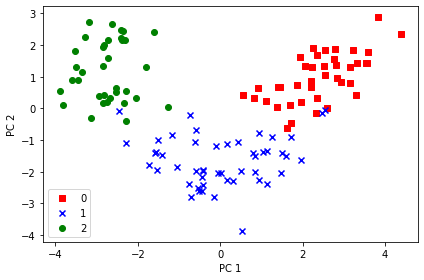

In [91]:
from PlotFunction3 import plot_reduced_dim
plot_reduced_dim(X_train_pca, y_train, "PCA")

### Note
It is possible to have Matrix W with its signs flipped. 

If $v$ is an eigenvector of a matrix $\Sigma$, we have

$\Sigma v = \lambda v,$

where $\lambda$ is our eigenvalue,

then $-v$ is also an eigenvector that has the same eigenvalue, since

$\Sigma(-v) = -\Sigma v = -\lambda v = \lambda(-v).$

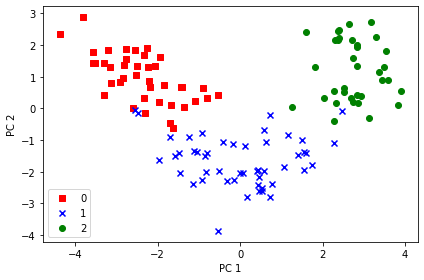

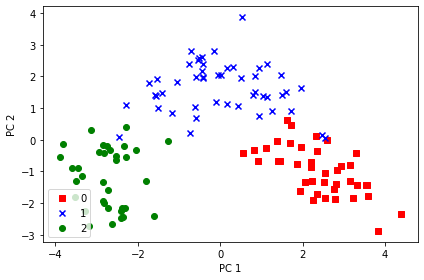

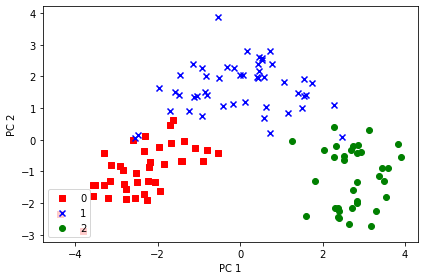

In [92]:
#Using eigenvectors with different signs
w2 = np.copy(w)
w2[:,0] = -w2[:,0]
X_train_pca = X_train_std.dot(w2)
plot_reduced_dim(X_train_pca, y_train, "PCA")

w2 = np.copy(w)
w2[:,1] = -w2[:,1]
X_train_pca = X_train_std.dot(w2)
plot_reduced_dim(X_train_pca, y_train, "PCA")

w2 = np.copy(w)
w2 = -w2
X_train_pca = X_train_std.dot(w2)
plot_reduced_dim(X_train_pca, y_train, "PCA")


## Method 2: Using SKL

In [93]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

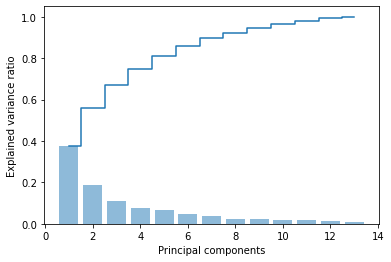

In [94]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [95]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

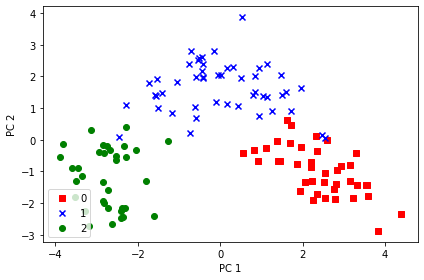

In [96]:
plot_reduced_dim(X_train_pca, y_train, "PCA")

## Training with logistic regression

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

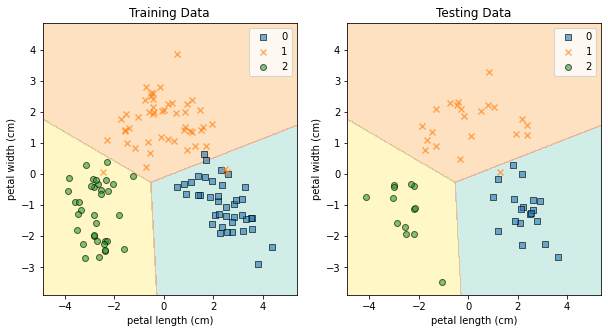

In [98]:
from PlotFunction2 import plot_decision_surface2

plot_decision_surface2(X_train_pca, X_test_pca, y_train, y_test, lr)